<a href="https://colab.research.google.com/github/shaifali1102/unsupervised-learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

- Principal Component Analysis
- can be used for data cleaning and data preprocessing:
  - **Dimensionality Reduction** - reduce no of features/dim while trying to keep the important info that helps understands the data
  - **Data compression** - compress info to store and transmit data more efficiently
  - **Feature extraction** - new features using linearly correlated features
  - **Visualization** - difficult for multi-dim data
  - **De-noise data** - finds components that explain max variance, hence it captures the signal in data and omits the noise
- **Assumptions of PCA**
  - features should be correlated to each other
  - features should be scaled as it is a distance based algo
  - linear relation between features
    - non-linear features can be converted using methods like log transforms
  - no missing values
- **Multicollinearity b/w PCs after PCA**
  - as PCs(eigen vectors) are **orthogonal** to each other, features are perpendicular to each other
  - new feature system won't have any similarity b/w them
  - dot product of any two features will be 0
  - therefore, there will be no multicollinearity in features transformed using PCA
- **Eigen vector & Eigen value**
  - helps identify the direction of the max variance
  - Eigen vector - direction of a PC in the feature space
  - Eigen values - quantifies the amount of variance by each $\vec v$  
  $$
  A \cdot \vec v = \lambda \cdot \vec v
  $$
  - where $A$ = matrix, $\vec v$ = eigen vector, $\lambda$ = eigen value
  - for PCA:
    - larger the eigen value, the eigen vector for that eigen value will preserve the most variance.
    - $A$ is the covariance matrix of size $d$x$d$
    - $\vec v$ is eigen vector of size $d$x$1$
    - $\lambda$ is the scaler eigen value
    - Eigen vector and values can be found via numpy:

      ```
      u, w = np.linalg.eig(A)
      ```

- **Working**
  1. Feature scaling
  2. Find covariance matrix,
  $$
  V_{(dxd)} = \frac{X^T \cdot X}{n}
  $$
  3. Find eigen vector and values,
  $$
  u, \lambda = np.linalg.eig(V)
  $$
  here, we will select $PC_1$ and $PC_2$ ($λ_1$ & $λ_2$)
  4. Projection of all points on $PC_1$ and $PC_2$
  $$
  X'_{(dxd)} = X_{(nxd)} \cdot u_{(dx2)}
  $$
- **Importance of PCs**
  - if there are $d$ features,
  $$
  u_1, u_2, u_3, ... , u_d
  $$
  - we will have $d$ eigen values such that,
  $$
  λ_1 > λ_2 > λ_3 > ... > λ_d
  $$
  - Importance of a PC becomes,
  $$
  Importance(u_1) = \frac{λ_1}{\sum_{i=1}^{d}λ_d}
  $$
- **Information preserved by PCs**
  - info preserved by $PC_1$ and $PC_2$ is
  $$
  \frac{λ_1 + λ_2}{\sum_{i=1}^{d}λ_d}
  $$
- **Advantages**
  - easy to compute
    - linear algebra is easy to solve by computers
  - speeds up other ML algos
    - ML algos converge faster when trained on principal components instead of original data
  - solves overfitting
    - regression based algos may overfit with high dim data, PCA lowers the dimensions of the training dataset, preventing the predictive algorithms from overfitting
- **Disadvantages**
  - low interpretablity - principal components are not easy to interpret
  - unresolved feature importances - since principal components are combinations of existing features, it is hard to determine the most important features in the dataset after computing principal components
  - trade-off b/w info loss and dim reduction
  - captures the global structure of the data but ignores the local structure of the data(tSNE can be used)
  - not robust to outliers

## Digits Dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn import datasets

digits = datasets.load_digits()

X=digits.data
print(X.shape)

(1797, 64)


In [19]:
print(X) #flattened pixel array

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


### Display or plot a number

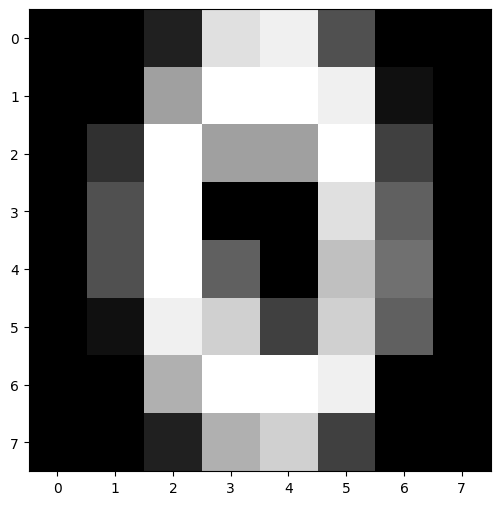

In [25]:
plt.figure(figsize=(6,6))

grid_data = X[55].reshape(8,8) #reshape from 1D to 2D pixel array for viz
plt.imshow(grid_data, cmap='gray')
plt.show()

In [27]:
# Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X.shape

(1797, 64)

In [28]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_emb = pca.fit_transform(X_scaled)

X_emb.shape

(1797, 2)

- the features were reduced from  64 to 2

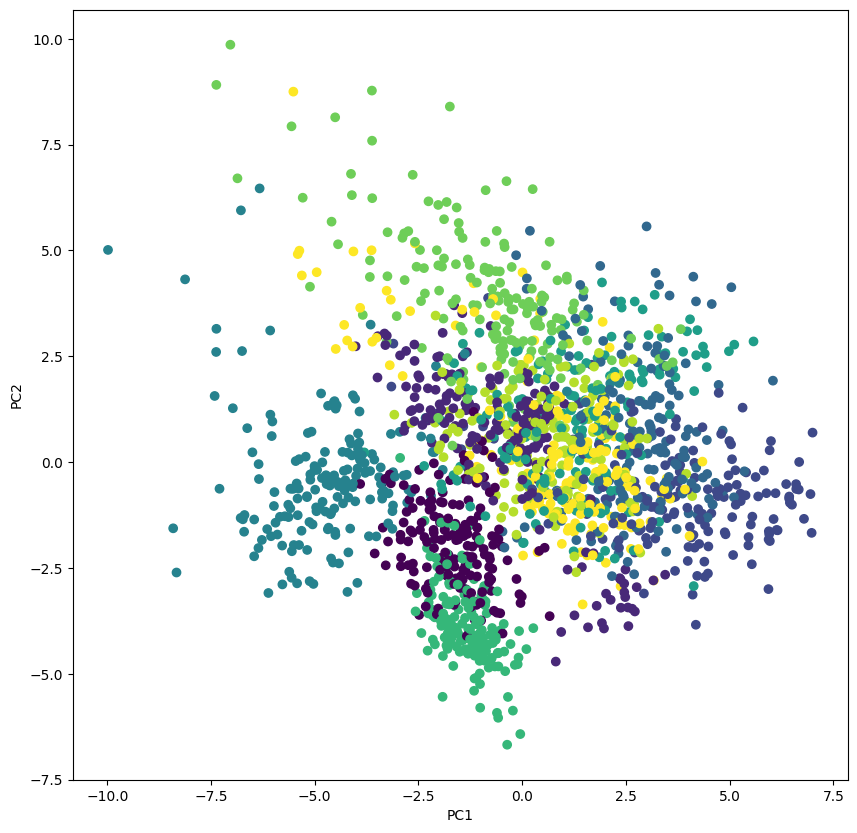

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(X_emb[:,0], X_emb[:,1], c=digits.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- The digits are not separated very well
- PCA is not the best for visualization, we can use tSNE or UMAP for viz.